**Modeling & Evaluation**

This notebook focuses on training and evaluating machine learning models
using preprocessed and scaled data prepared in the feature engineering phase.

All preprocessing steps (splitting, encoding, scaling) were completed earlier
to avoid data leakage.


In [49]:
import numpy as np
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [66]:
X_train=pd.read_csv('/Customer-churn-prediction/data/X_train.csv')
X_test=pd.read_csv('/Customer-churn-prediction/data/X_test.csv')
y_test=pd.read_csv('/Customer-churn-prediction/data/y_test.csv')
y_train=pd.read_csv('/Customer-churn-prediction/data/y_train.csv')

In [67]:
scaler=joblib.load('/Customer-churn-prediction/models/scaler.pkl')

The scaler is loaded for inference and deployment purposes.
It is not re-fitted in this notebook.


Logistic Regression

In [52]:
log_reg=LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train,y_train)

y_pred_lr=log_reg.predict(X_test)
y_proba_lr=log_reg.predict_proba(X_test)[:,1]

c:\Users\ASUS\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression:Model Evaluation

In [53]:
print("Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Model Precision:", precision_score(y_test, y_pred_lr))
print("Model Recall:", recall_score(y_test, y_pred_lr))
print("Model F1 Score:", f1_score(y_test, y_pred_lr))
print("Model ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Model Accuracy: 0.8055358410220014
Model Precision: 0.6572327044025157
Model Recall: 0.5588235294117647
Model F1 Score: 0.6040462427745664
Model ROC AUC: 0.8420677361853834
Confusion Matrix:
 [[926 109]
 [165 209]]


In [54]:
print("classification report:\n", classification_report(y_test, y_pred_lr))

classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Advanced model: Random Forest

In [55]:
rf=RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
y_proba_rf=rf.predict_proba(X_test)[:,1]

c:\Users\ASUS\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest : Model evaluation

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7885024840312278
Precision: 0.6283783783783784
Recall: 0.49732620320855614
F1 Score: 0.5552238805970149
ROC AUC: 0.8237541656978996
Confusion Matrix:
 [[925 110]
 [188 186]]


In [58]:
print("classification report:\n", classification_report(y_test, y_pred_rf))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Model Comparsion

In [59]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Logistic Regression': [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr), roc_auc_score(y_test, y_proba_lr)],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf), roc_auc_score(y_test, y_proba_rf)]
})

In [60]:
results

,Metric,Logistic Regression,Random Forest
0,Accuracy,0.805536,0.788502
1,Precision,0.657233,0.628378
2,Recall,0.558824,0.497326
3,F1 Score,0.604046,0.555224
4,ROC AUC,0.842068,0.823754


ROC AUC curve

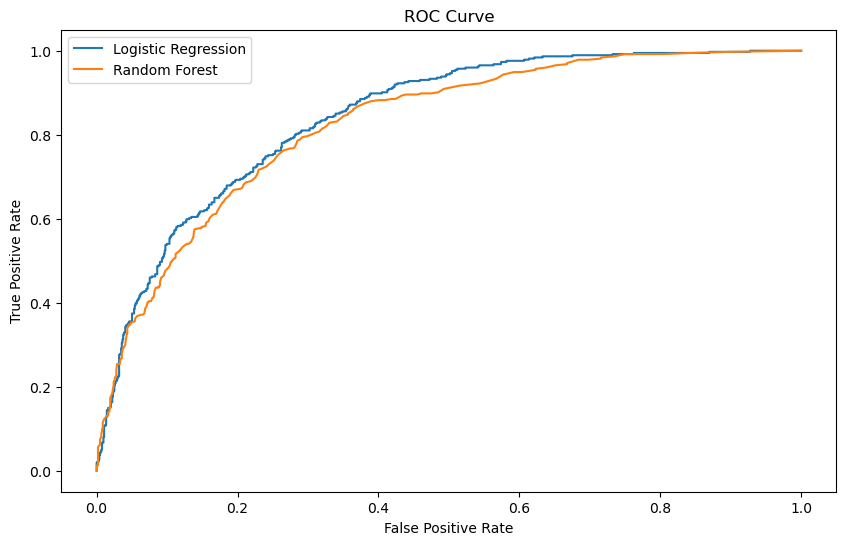

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Feature Importance : Random Forest

<BarContainer object of 30 artists>

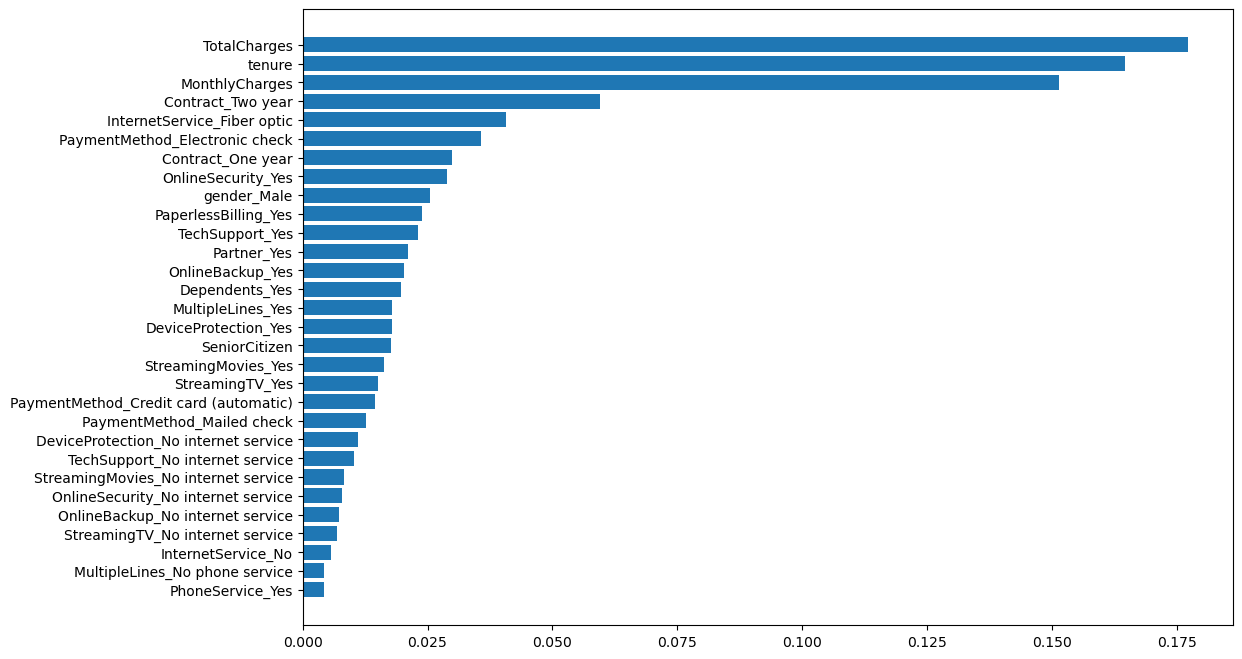

In [68]:
feature_names=joblib.load('/Customer-churn-prediction/models/feature_names.pkl')

feature_importances=pd.DataFrame({
    'Feature':feature_names,
    'Importance':rf.feature_importances_
}).sort_values(by='Importance',ascending= True)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])

In [69]:
joblib.dump(rf, '/Customer-churn-prediction/models/random_forest_model.pkl')
joblib.dump(log_reg, '/Customer-churn-prediction/models/logistic_regression_model.pkl')

['/Customer-churn-prediction/models/logistic_regression_model.pkl']

The trained model is saved for future inference and deployment.


## Conclusion

- Random Forest provided a strong and interpretable baseline.
- Logistic Regression improved recall and ROC-AUC, making it more suitable for churn detection.
- The final model can help businesses identify high-risk customers
  and apply targeted retention strategies.

This project follows a clean, production-ready machine learning pipeline.
